In [23]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras import layers, models

In [26]:
def load_images(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = Image.open(os.path.join(directory, filename))
            img = img.resize((64, 64))  
            img_array = np.array(img) / 255.0
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

In [27]:
healthy_dir = 'healthy_rice_plant'
diseased_dir = 'rice_blast\\rice_blast'

healthy_images, healthy_labels = load_images(healthy_dir, 0)  
diseased_images, diseased_labels = load_images(diseased_dir, 1)  

images = np.concatenate((healthy_images, diseased_images), axis=0)
labels = np.concatenate((healthy_labels, diseased_labels), axis=0)

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation images shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Train images shape: (241, 64, 64, 3)
Train labels shape: (241,)
Validation images shape: (61, 64, 64, 3)
Validation labels shape: (61,)
Test images shape: (76, 64, 64, 3)
Test labels shape: (76,)


In [28]:
def happyModel():
    model = tf.keras.Sequential([
    tfl.Conv2D(8,(3,3),activation='relu', input_shape=(64,64,3)),
    tfl.Conv2D(16, (3, 3), activation='relu'),
    tfl.Conv2D(32, (3, 3), activation='relu'),
    tfl.Conv2D(64, (3, 3), activation='relu'),
    
    tfl.Flatten(),
    
    tfl.Dense(64, activation='relu'),
    tfl.Dense(1, activation='sigmoid')
        ])
    
    return model

In [29]:
model = happyModel()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()

# Train the model
history = model.fit(train_images, train_labels, epochs=15, validation_data=(val_images, val_labels))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 8)         224       
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        1168      
                                                                 
 conv2d_6 (Conv2D)           (None, 58, 58, 32)        4640      
                                                                 
 conv2d_7 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 200704)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                12845120  
                                                                 
 dense_3 (Dense)             (None, 1)                

In [30]:
predictions = model.predict(test_images)
predicted_labels = (predictions > 0.5).astype("int32")
unique, counts = np.unique(predicted_labels, return_counts=True)
counts_dict_pred = dict(zip(unique, counts))
print(counts_dict_pred)

3/3 [==============================] - 0s 38ms/step
{0: 40, 1: 36}


In [31]:
unique, counts = np.unique(test_labels, return_counts=True)
counts_dict = dict(zip(unique, counts))
print(counts_dict)


{0: 35, 1: 41}


  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 45ms/step


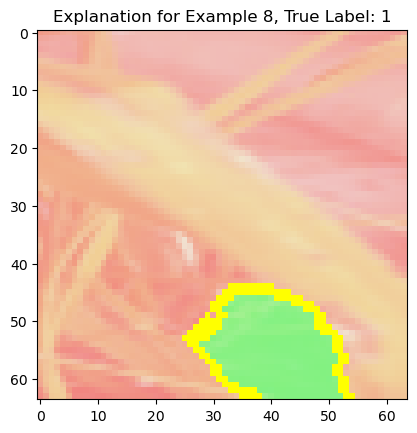

In [32]:
import lime
import lime.lime_image
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries

explainer = lime.lime_image.LimeImageExplainer()

example_idx = 8
example_image = test_images[example_idx]
true_label = test_labels[example_idx]

example_image_preprocessed = example_image.reshape(1, 64, 64, 3)

explanation = explainer.explain_instance(example_image_preprocessed[0], 
                                         model.predict, 
                                         top_labels=1, 
                                         hide_color=0, 
                                         num_samples=500)

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                            positive_only=False, 
                                            num_features=5, 
                                            hide_rest=True)

plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.title(f"Explanation for Example {example_idx}, True Label: {true_label}")
plt.show()


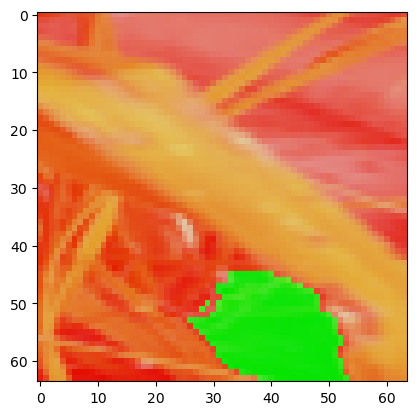

In [21]:
plt.imshow(temp)

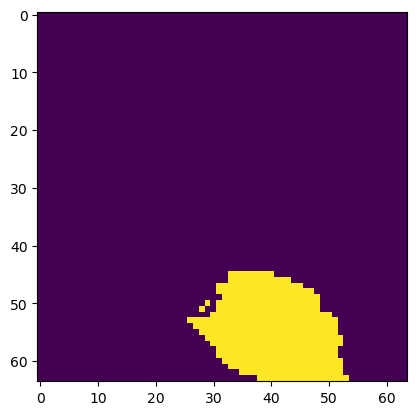

In [22]:
plt.imshow(mask)

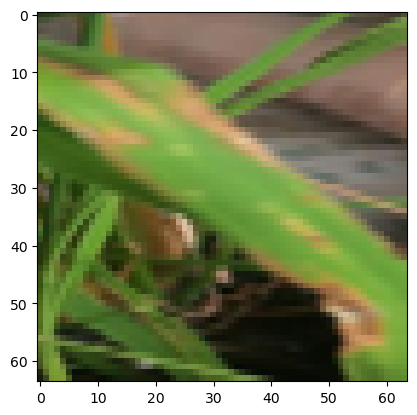

In [19]:
plt.imshow(test_images[8])

In [179]:
pt=model.predict(train_images)

8/8 [==============================] - 0s 42ms/step


In [18]:
predicted_labels[8]

array([1])